In [1]:
from utils.plot_utils import plot_returns
from scipy.interpolate import UnivariateSpline
import numpy as np

In [7]:
environment = "simplegrid"
n_seeds = 30

# legends = ["Decision Tree, Depth=6","Decision Tree, Depth=8","Decision Tree, Depth=10", "Decision Tree, Depth=12", "Decision Tree, Depth=14"]

# models = ["Neural Network", "Linear Model", "Decision Tree", "Random Forest", "K-Neighbours"]
# legends = ["Neural Network", "Linear Model", "Decision Tree (FQI)", "Random Forest (FQI)", "K-Neighbours (FQI)"]
# colours = ["blue", "yellow", "darkred", "darkgreen", "saddlebrown"]
# n=1

models = ["Neural Network", "Linear Model", "Support Vectors", "Gaussian Process", "Gaussian Process Online"]
legends = ["Neural Network", "Linear Model", "Support Vectors (FQI)", "Gaussian Process (FQI)", "Gaussian Process (Online)"]
colours = ["blue", "yellow", "red", "indigo", "black"]
n=2

# models = ["Neural Network", "Linear Model", "Decision Tree", "Random Forest", "K-Neighbours", "Support Vectors", "Gaussian Process", "Gaussian Process Online"]
# legends = ["Neural Network", "Linear Model", "Decision Tree (FQI)", "Random Forest (FQI)", "K-Neighbours (FQI)", "Support Vectors (FQI)", "Gaussian Process (FQI)", "Gaussian Process (Online)"]
# colours = ["blue", "yellow", "darkred", "darkgreen", "saddlebrown", "red", "indigo", "black"]

markers = ["x","^","<","v",">","*", ".", "o"]

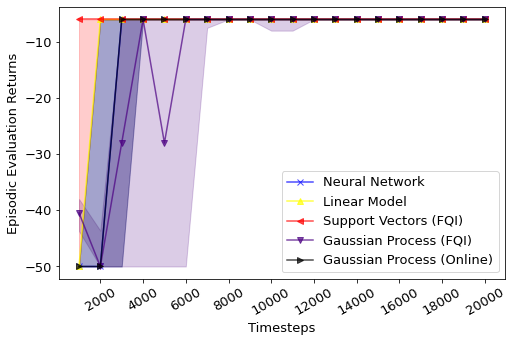

In [8]:
## Evaluation Returns Robust
eval_medians = []
eval_lower = []
eval_upper = []
eval_cvar = []
for i in range(len(models)):
    a = np.genfromtxt(f'results/{environment}/eval_returns/{environment}_eval_{models[i]}.csv', delimiter=',')
    cvar, q1, median, q3 = np.percentile(a, [5, 25, 50, 75], axis=0)
    eval_medians.append(median)
    eval_lower.append(q1)
    eval_upper.append(q3)
    eval_cvar.append(cvar)

plot_returns(save_name=f"{environment}_eval_{n}", values=eval_medians, lower=eval_lower, upper=eval_upper, colours=colours, xlabel="Timesteps", ylabel="Episodic Evaluation Returns", legend_names=legends, eval_freq=1000, tick_freq=1000, markers=markers)
# plot_returns(save_name=f"{environment}_eval_risk", values=eval_cvar, lower=eval_cvar, upper=eval_cvar, colours=colours, xlabel="Timesteps", ylabel="Episodic Evaluation Returns", legend_names=legends, eval_freq=1000, tick_freq=1000, markers=markers, legend_outside=True)

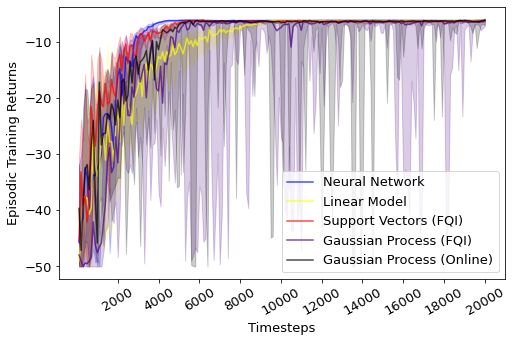

In [9]:
## Train Returns Robust
train_medians = []
train_lower = []
train_upper = []
train_cvar = []
xs = np.linspace(250, 5000, 200)

for i in range(len(models)):
    a = np.genfromtxt(f'results/{environment}/train_returns/{environment}_train_{models[i]}.csv', delimiter=',')
    points = []
    
    for j in range(0, n_seeds*2, 2):
        x = [t for t in a[j+1,:] if np.isnan(t) == False]
        y = [r for r in a[j,:] if np.isnan(r) == False]
        spline = UnivariateSpline(x, y)
        points.append(np.clip(spline(xs), -50, -6))
        # points.append(np.cumsum(spline(xs)))

    points = [p for p in points if np.isnan(p[0]) == False] 
    cvar, q1, median, q3 = np.percentile(points, [5, 25, 50, 75], axis=0)
    train_medians.append(median)
    train_lower.append(q1)
    train_upper.append(q3)
    train_cvar.append(cvar)

plot_returns(save_name=f"{environment}_train_{n}_nonc", values=train_medians, lower=train_lower, upper=train_upper, colours=colours, xlabel="Timesteps", ylabel="Episodic Training Returns", legend_names=legends, tick_freq=1000, eval_freq=100, markers=None)